# K Means Clustering Algorithm

## Studi Kasus

Data yang anda miliki adalah data penjualan setelah terjadinya pandemi Covid-19 dengan kategori produk sports & apparel. Dikarenakan saat ini penjualan banyak dilakukan secara online, anda berencana untuk memperbaiki tampilan website dengan cara mengelompokkan produk berdasarkan kategori-kategori tertentu. Perombakan ini diharapkan dapat mempermudah pembeli dalam memilih barang sesuai dengan selera dan kebutuhan mereka. Untuk mencapai tujuan tersebut anda akan menggunakan history penjualan sebelumnya. Data yang anda miliki adalah sebagai berikut :

- Product Name : Nama produk 
- Product ID : Id unik produk
- Listing Price : Harga sebenarnya dari produk
- Sale Price : Harga saat produk dibeli
- Discount : Diskon yang diberikan dalam suatu produk
- Brand : Nama Brand dari produk
- Description : Deskripsi produk
- Rating : Rating yang diberikan user
- Listing Price : Jumlah review suatu produk
- Last Visited : Record terakhir produk dikunjungi oleh customer

Selain mengelompokkan produk, anda juga ingin menganalisis persaingan yang terjadi pada tiap-tiap brand. Dengan mengetahui minat pembeli, harapannya untuk kedepannya anda dapat menyesuaikan store anda dengan kebutuhan pasar.

## Import Libraries and Data

In [ ]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mendefinisikan data path
path = '/content/drive/My Drive/SMT_6/GCollab DS-1/Dataset - Klustering/'

In [ ]:
#Loading the dataset
df = pd.read_csv(path + "Clustering_product.csv")
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t


In [ ]:
#cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited	  3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [ ]:
# Data kategori
categorical = ["Brand"]
df_categorical = df[categorical]
df_categorical.head()

,Brand
0,Adidas ORIGINALS
1,Adidas ORIGINALS
2,Adidas CORE / NEO
3,Adidas CORE / NEO
4,Adidas ORIGINALS


> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

persebaran data product

<Axes: >

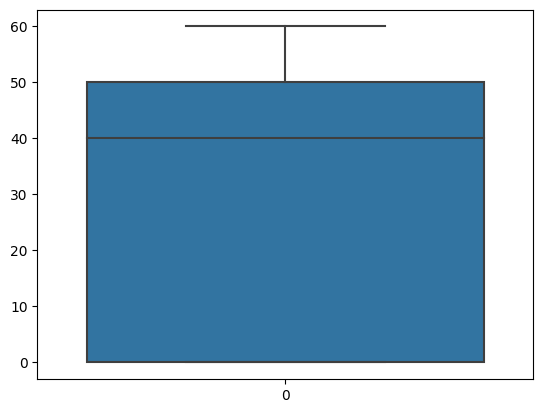

In [ ]:
#Persebaran data
sns.boxplot(df["Discount"])

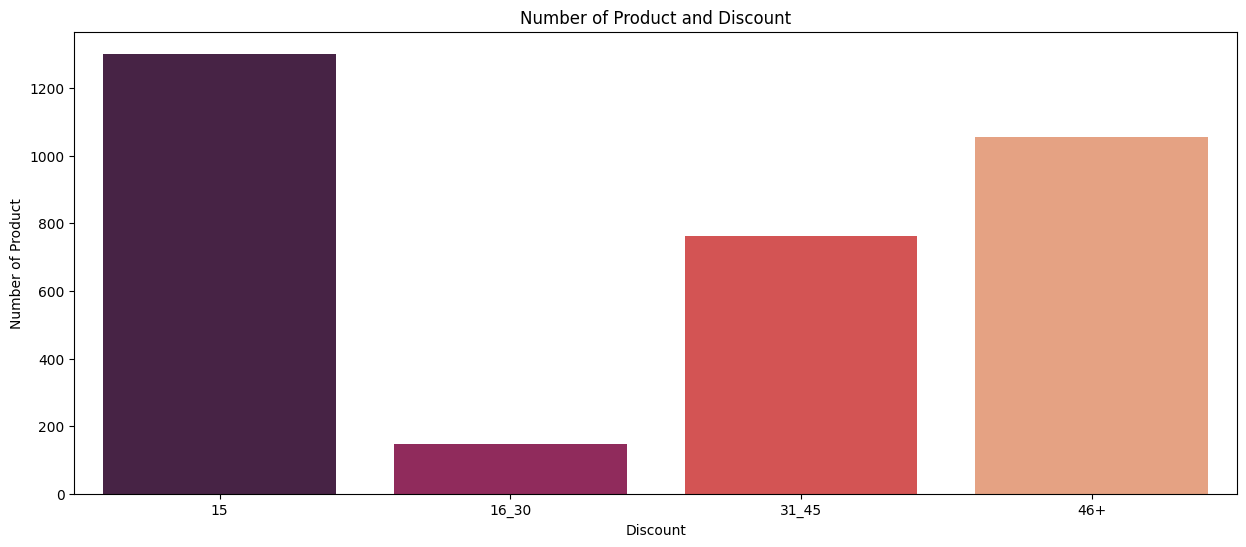

In [ ]:
# Menggolongkan diskon dan melihat persebarannya dalam data
price15below = df.Discount[(df.Discount <= 15) & (df.Discount >= 0)]
price16_30 = df.Discount[(df.Discount <= 30) & (df.Discount >= 16)]
price31_45 = df.Discount[(df.Discount <= 45) & (df.Discount >= 31)]
price46above = df.Discount[(df.Discount >= 46)]

x = ["15","16_30","31_45","46+"]
y = [len(price15below.values),len(price16_30.values),len(price31_45.values),len(price46above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Product and Discount")
plt.xlabel("Discount")
plt.ylabel("Number of Product")
plt.show()

<Axes: >

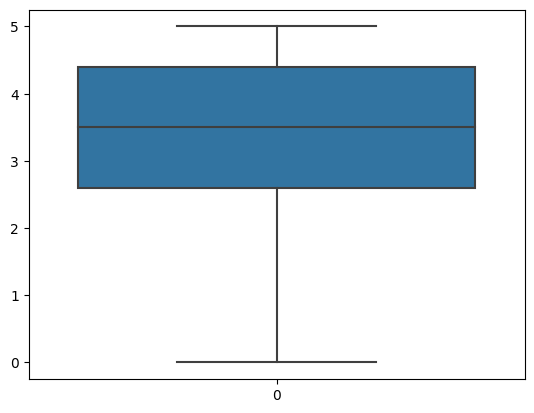

In [ ]:
#Persebaran data rating
sns.boxplot(df["Rating"])

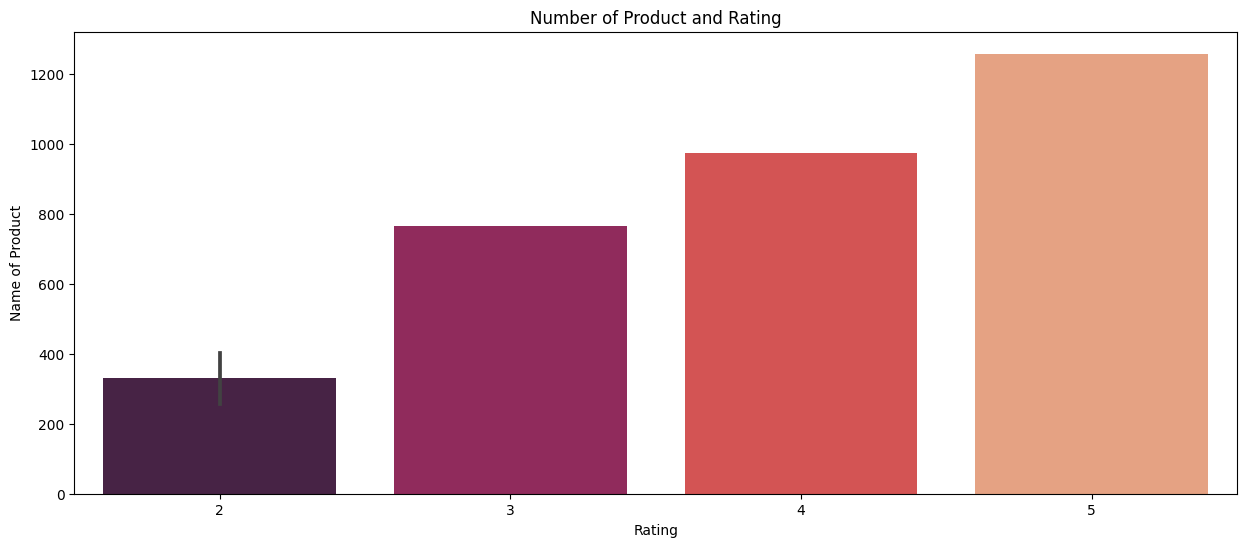

In [ ]:
# Menggolongkan diskon dan melihat persebarannya dalam data
rating1below = df.Rating[(df.Rating <= 1) & (df.Rating >= 0)]
rating2 = df.Rating[(df.Rating<= 2) & (df.Rating >= 1)]
rating3 = df.Rating[(df.Rating <= 3) & (df.Rating >= 2)]
rating4 = df.Rating[(df.Rating <= 4) & (df.Rating >= 3)]
rating5 = df.Rating[(df.Rating <= 5) & (df.Rating >= 4)]

x = ["2","2","3","4", "5"]
y = [len(rating1below.values),len(rating2.values),len(rating3.values),len(rating4.values),len(rating5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Product and Rating")
plt.xlabel("Rating")
plt.ylabel("Name of Product")
plt.show()

## Handling outlier

## Kolom Reviews

<Axes: >

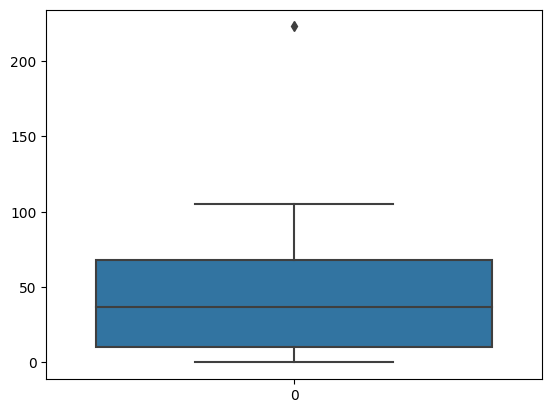

In [ ]:
#Persebaran data review
sns.boxplot(df["Reviews"])

In [ ]:
import statistics

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(df):
    outliers = []
    df = sorted(df)
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in df: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
score_outliers = detect_outliers_iqr(df['Reviews'])
print("Outliers from IQR method: ", score_outliers)
print("Banyaknya outlier: ",len(score_outliers))

Outliers from IQR method:  [223]
Banyaknya outlier:  1


In [ ]:
# Menghapus outlier
tr = []
for j in df['Reviews']:
    f = j in score_outliers
    if f is False:
        tr.append(j)
print(tr)

[41, 24, 37, 35, 72, 45, 2, 7, 16, 39, 36, 35, 97, 62, 16, 69, 16, 8, 62, 67, 30, 43, 13, 81, 70, 46, 63, 95, 15, 34, 86, 3, 67, 5, 85, 4, 35, 13, 20, 41, 72, 32, 84, 75, 4, 48, 12, 83, 11, 42, 69, 33, 35, 18, 89, 47, 94, 35, 39, 98, 6, 17, 77, 17, 28, 88, 23, 8, 64, 52, 70, 59, 14, 2, 38, 85, 6, 46, 9, 87, 28, 87, 66, 54, 66, 1, 94, 49, 6, 99, 67, 49, 42, 90, 88, 44, 74, 19, 54, 79, 5, 96, 41, 8, 80, 22, 94, 68, 3, 46, 50, 75, 71, 48, 36, 7, 69, 71, 65, 3, 74, 2, 84, 34, 54, 49, 35, 48, 25, 51, 12, 51, 31, 41, 5, 78, 96, 26, 53, 78, 90, 96, 82, 69, 21, 88, 32, 20, 44, 69, 66, 65, 56, 15, 51, 84, 57, 43, 83, 14, 62, 49, 37, 38, 88, 98, 93, 18, 23, 59, 90, 37, 47, 46, 85, 68, 74, 1, 48, 0, 14, 69, 83, 86, 90, 58, 73, 11, 32, 78, 47, 81, 15, 98, 1, 51, 57, 50, 80, 75, 90, 68, 15, 64, 79, 70, 68, 23, 70, 42, 77, 52, 92, 29, 93, 24, 1, 83, 68, 73, 50, 61, 35, 98, 49, 50, 52, 91, 51, 81, 48, 98, 9, 35, 78, 90, 15, 2, 78, 47, 24, 35, 73, 43, 35, 53, 83, 45, 66, 75, 94, 6, 65, 36, 25, 8, 75, 

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df.Reviews)))
print("Median data : ",statistics.median(list(df.Reviews)))
print("Mean data setelah deleting : ",statistics.mean(tr))
print("Median data setelah deleting: ",statistics.median(tr))

Mean data :  40.55171358629131
Median data :  37.0
Mean data setelah deleting :  40.49586776859504
Median data setelah deleting:  37


Text(0.5, 0, 'Reviews')

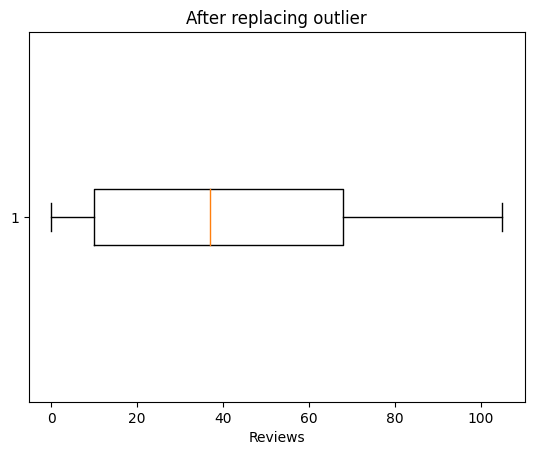

In [ ]:
plt.boxplot(tr, vert=False)
plt.title("After replacing outlier")
plt.xlabel('Reviews')

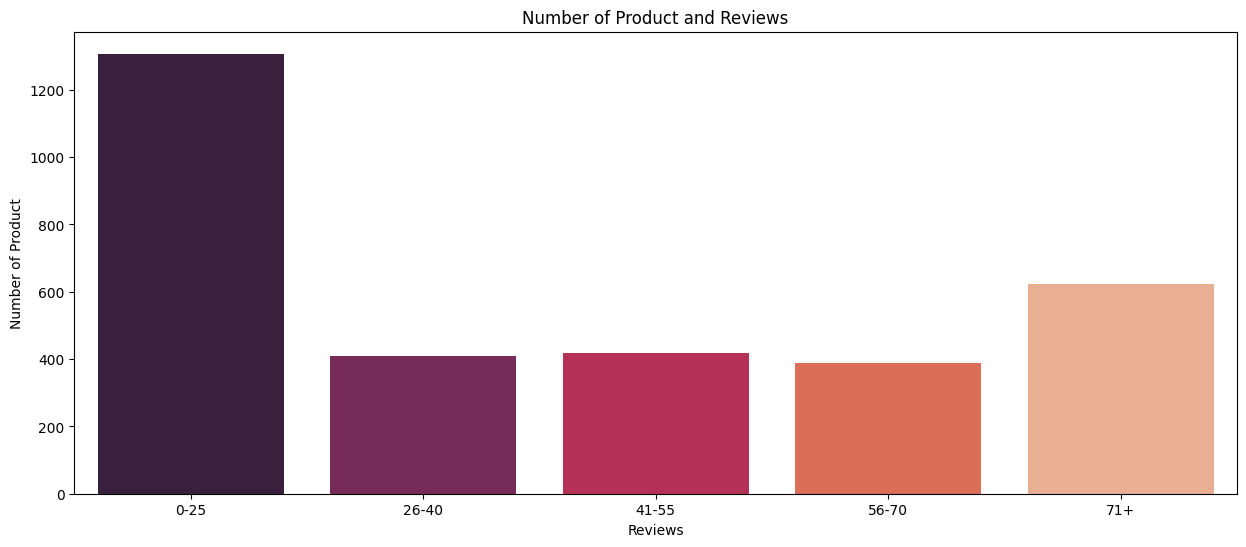

In [ ]:
# Menggolongkan review dan melihat persebarannya dalam data
Reviews1below = df.Reviews[(df.Reviews <= 25) & (df.Reviews >= 0)]
Reviews2 = df.Reviews[(df.Reviews<= 40) & (df.Reviews >= 26)]
Reviews3 = df.Reviews[(df.Reviews <= 55) & (df.Reviews >= 41)]
Reviews4 = df.Reviews[(df.Reviews <= 70) & (df.Reviews >= 56)]
Reviews5 = df.Reviews[(df.Reviews >= 76)]

x = ["0-25","26-40","41-55","56-70", "71+"]
y = [len(Reviews1below.values),len(Reviews2.values),len(Reviews3.values),len(Reviews4.values),len(Reviews5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Product and Reviews")
plt.xlabel("Reviews")
plt.ylabel("Number of Product")
plt.show()

## Kolom Listing Price

<Axes: >

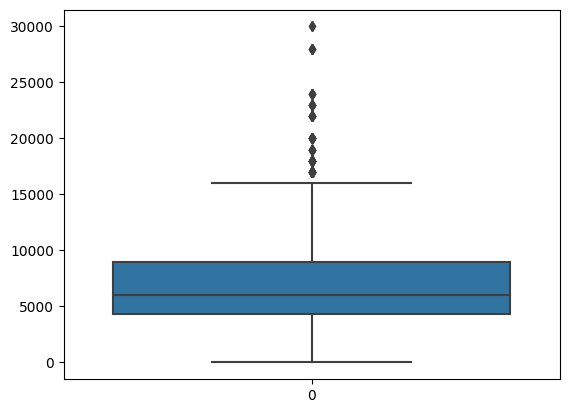

In [ ]:
#Persebaran data listing price
sns.boxplot(df["Listing Price"])

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(df):
    outliers = []
    df = sorted(df)
    q1 = np.percentile(df, 35)
    q3 = np.percentile(df, 65)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in df: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
score_outliers = detect_outliers_iqr(df['Listing Price'])
print("Outliers from IQR method: ", score_outliers)
print("Banyaknya outlier: ",len(score_outliers))

Outliers from IQR method:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Menghapus outlier
tr = []
for j in df['Listing Price']:
    f = j in score_outliers
    if f is False:
        tr.append(j)
print(tr)

[7599, 999, 6999, 7999, 4799, 4799, 999, 5599, 6599, 7599, 6599, 5999, 7599, 7999, 5999, 4599, 3999, 3299, 4299, 5599, 4299, 3799, 6599, 3799, 3299, 3799, 4299, 5599, 3299, 3299, 3299, 3299, 5599, 3999, 5599, 4599, 5599, 8599, 6599, 6599, 6599, 7599, 5599, 6999, 5599, 4999, 4999, 3299, 4999, 6999, 6599, 11999, 7999, 2699, 7999, 5599, 7999, 5599, 4999, 4299, 5999, 4999, 4799, 4599, 5999, 7999, 4799, 4599, 5999, 7599, 1299, 2799, 4599, 7999, 7999, 4999, 1299, 1499, 5999, 7999, 4599, 5599, 4799, 7999, 4599, 4999, 5299, 1999, 9999, 5999, 8999, 6599, 4599, 4999, 5999, 4599, 4799, 5599, 4999, 3599, 1599, 4799, 1299, 4999, 4799, 6599, 5599, 8999, 5599, 3599, 4299, 5599, 7999, 8999, 7999, 7999, 6599, 1599, 7999, 9999, 4799, 7599, 11999, 6999, 7999, 4999, 7599, 4799, 4799, 2499, 7599, 6599, 7999, 7599, 7999, 8999, 4999, 2499, 7599, 7599, 7599, 7999, 999, 6599, 6599, 11999, 2499, 7599, 11999, 11999, 7999, 5999, 7999, 10999, 7999, 2699, 2999, 8999, 9999, 7999, 11999, 7999, 7999, 2699, 8999, 4999,

Text(0.5, 0, 'Listing Price')

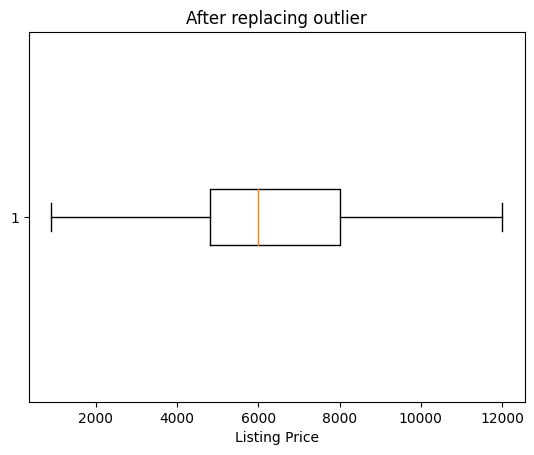

In [ ]:
plt.boxplot(tr, vert=False)
plt.title("After replacing outlier")
plt.xlabel('Listing Price')

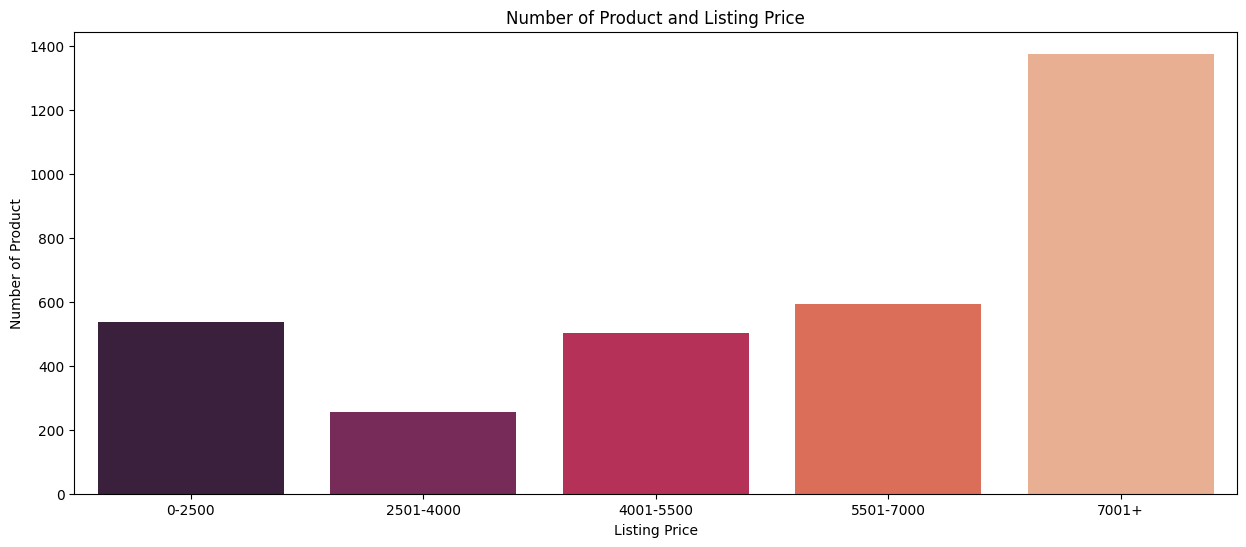

In [ ]:
# Menggolongkan review dan melihat persebarannya dalam data
Listing_Price1 = df['Listing Price'][(df['Listing Price'] <= 2500) & (df['Listing Price'] >= 0)]
Listing_Price2 = df['Listing Price'][(df['Listing Price']<= 4000) & (df['Listing Price'] >= 2501)]
Listing_Price3 = df['Listing Price'][(df['Listing Price'] <= 5500) & (df['Listing Price'] >= 4001)]
Listing_Price4 = df['Listing Price'][(df['Listing Price'] <= 7000) & (df['Listing Price'] >= 5501)]
Listing_Price5 = df['Listing Price'][(df['Listing Price'] >= 7001)]

x = ["0-2500","2501-4000","4001-5500","5501-7000", "7001+"]
y = [len(Listing_Price1.values),len(Listing_Price2.values),len(Listing_Price3.values),len(Listing_Price4.values),len(Listing_Price5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Product and Listing Price")
plt.xlabel("Listing Price")
plt.ylabel("Number of Product")
plt.show()

## Kolom Sale Price

<Axes: >

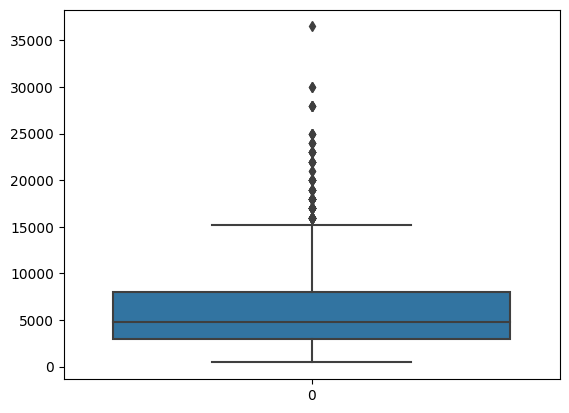

In [ ]:
#Persebaran data sale price
sns.boxplot(df["Sale Price"])

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(df):
    outliers = []
    df = sorted(df)
    q1 = np.percentile(df, 30)
    q3 = np.percentile(df, 70)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in df: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
score_outliers = detect_outliers_iqr(df['Sale Price'])
print("Outliers from IQR method: ", score_outliers)
print("Banyaknya outlier: ",len(score_outliers))

Outliers from IQR method:  [12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12995, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 12999, 13199, 13199, 13297, 13299, 13495, 13597, 13597, 13597, 13597, 13597, 13597, 13597, 13597, 13597, 13799, 13799, 13799, 13799, 13799, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13995, 13999, 13999, 13999, 13999, 13999, 13999, 13999, 13999, 13999, 13999, 14397, 14397, 14495, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14995, 14999, 14999, 14999, 14999, 14999, 14999, 14999, 14999, 14999, 14999, 14999, 15197, 15995, 15995, 15995, 15995, 15995,

In [ ]:
# Menghapus outlier
tr = []
for j in df['Sale Price']:
    f = j in score_outliers
    if f is False:
        tr.append(j)
print(tr)

[7499, 3799, 599, 3499, 3999, 1920, 2399, 599, 2799, 3959, 4559, 3959, 2999, 4559, 3999, 2999, 2299, 1999, 1649, 2149, 2799, 2149, 2279, 3299, 1899, 1979, 2279, 2149, 3359, 1979, 1979, 1979, 1979, 3359, 2399, 3359, 2759, 3359, 5159, 3959, 3959, 3959, 4559, 3359, 4199, 3359, 2999, 2999, 1979, 2999, 4199, 3959, 7199, 4799, 1349, 4799, 3359, 4799, 3359, 2000, 2149, 2999, 2999, 2399, 2299, 3599, 4799, 2399, 2299, 2999, 4559, 779, 1399, 2299, 7999, 3999, 2499, 779, 749, 2999, 3999, 2299, 2799, 2399, 3999, 9999, 7999, 2299, 2499, 2649, 999, 4999, 2999, 4499, 3299, 2299, 2499, 3599, 2299, 2399, 2799, 2499, 2159, 959, 2399, 779, 2499, 2399, 3299, 2799, 5399, 3359, 2159, 2149, 2799, 3999, 5399, 4799, 4799, 3959, 959, 4799, 4999, 6999, 2399, 4559, 7199, 4199, 4799, 3499, 4559, 2399, 2399, 1749, 5319, 3959, 5599, 4559, 5599, 6299, 2999, 1749, 7999, 4559, 3799, 4559, 4799, 499, 3959, 3959, 7199, 1749, 8499, 5319, 4800, 7199, 4799, 2999, 4799, 6599, 4799, 2159, 2399, 5399, 4999, 5599, 7199, 4799, 6

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df['Sale Price'])))
print("Median data : ",statistics.median(list(df['Sale Price'])))
print("Mean data setelah deleting : ",statistics.mean(tr))
print("Median data setelah deleting: ",statistics.median(tr))

Mean data :  6134.265605875153
Median data :  4799.0
Mean data setelah deleting :  5179.673237554293
Median data setelah deleting:  4499


Text(0.5, 0, 'Sale Price')

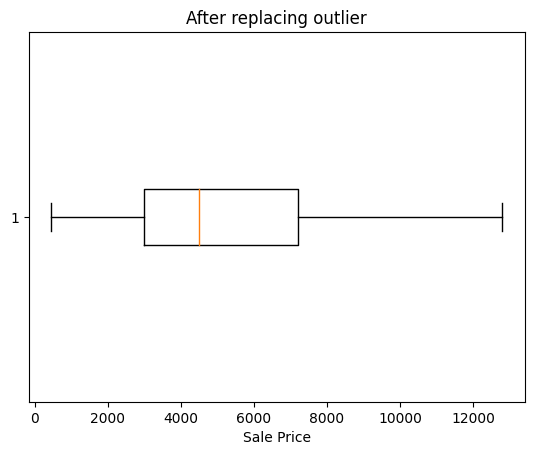

In [ ]:
plt.boxplot(tr, vert=False)
plt.title("After replacing outlier")
plt.xlabel('Sale Price')

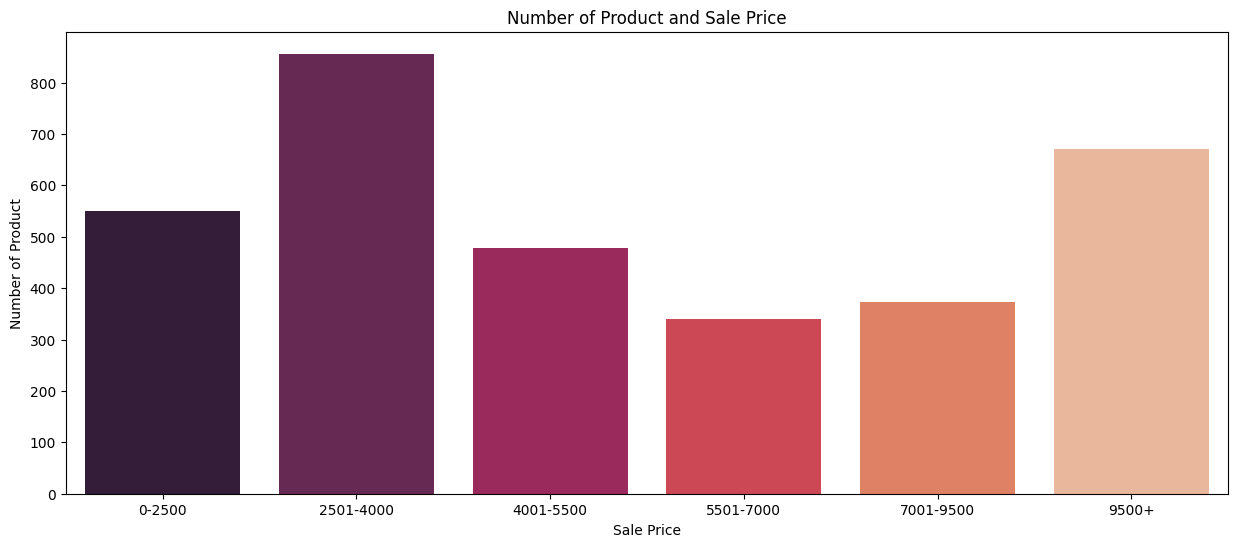

In [ ]:
# Menggolongkan review dan melihat persebarannya dalam data
Sale_Price1 = df['Sale Price'][(df['Sale Price'] <= 2500) & (df['Sale Price'] >= 0)]
Sale_Price2 = df['Sale Price'][(df['Sale Price']<= 4000) & (df['Sale Price'] >= 2501)]
Sale_Price3 = df['Sale Price'][(df['Sale Price'] <= 5500) & (df['Sale Price'] >= 4001)]
Sale_Price4 = df['Sale Price'][(df['Sale Price'] <= 7000) & (df['Sale Price'] >= 5501)]
Sale_Price5 = df['Sale Price'][(df['Sale Price'] <= 8500) & (df['Sale Price'] >= 7001)]
Sale_Price6 = df['Sale Price'][(df['Sale Price'] >= 8501)]

x = ["0-2500","2501-4000","4001-5500","5501-7000", "7001-9500", "9500+"]
y = [len(Sale_Price1.values),len(Sale_Price2.values),len(Sale_Price3.values),len(Sale_Price4.values),len(Sale_Price5.values), len(Sale_Price6.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Product and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Number of Product")
plt.show()

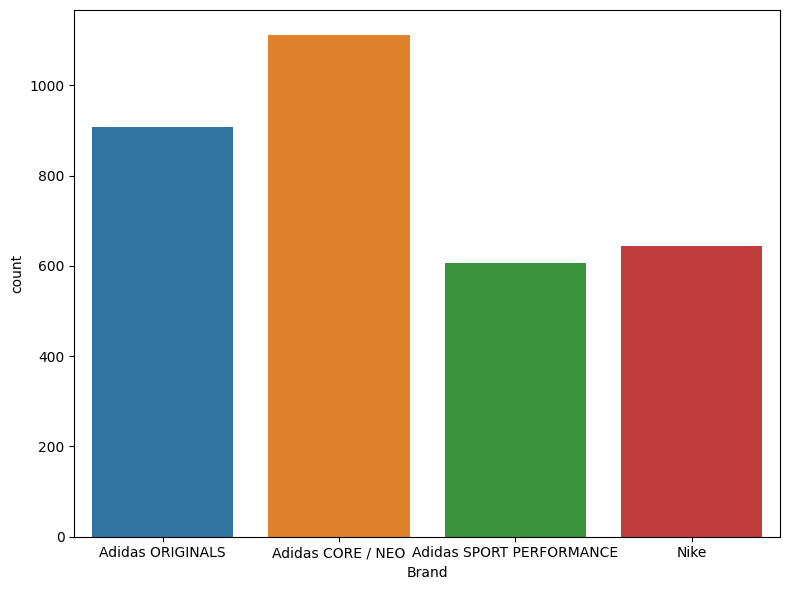

In [ ]:
# Melihat perbandingan data kategori disetiap kolom
for col in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df)
    plt.tight_layout()

## Data Preprocessing

In [ ]:
#Membuat dataframe baru setelah handling outlier
new_df = df[["Product Name", "Product ID", "Listing Price", "Sale Price", "Discount", "Brand", "Description", "Rating", "Reviews"]]
new_df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72


In [ ]:
new_df.rename(columns={"Listing Price": "Listing_Price", "Sale Price": "Sale_Price"}, inplace=True)

new_df.head()

<ipython-input-226-07f53c3c036b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={"Listing Price": "Listing_Price", "Sale Price": "Sale_Price"}, inplace=True)


,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 229.9+ KB


### Encode Categorical

In [ ]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom
cluster_data = pd.concat([encoded_data, new_df[["Listing_Price", "Sale_Price", "Discount", "Rating", "Reviews"]]], axis=1)

cluster_data.head()

,Brand,Listing_Price,Sale_Price,Discount,Rating,Reviews
0,1,14999,7499,50,4.8,41
1,1,7599,3799,50,3.3,24
2,0,999,599,40,2.6,37
3,0,6999,3499,50,4.1,35
4,1,7999,3999,50,3.5,72


### Features Selection
Dalam proses ini akan dipilih variabel yang memiliki pengaruh besar dalam penentuan cluster data.

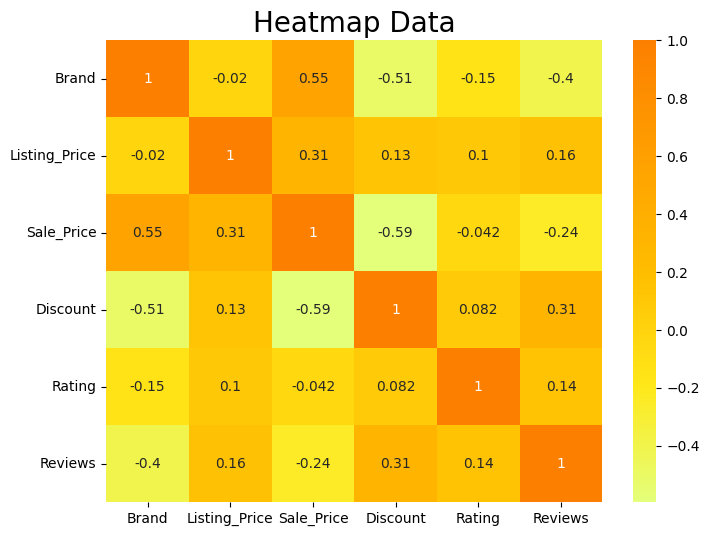

In [ ]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = new_df.corr()["Sale_Price"].sort_values()
korelasi

<ipython-input-230-f09e12dcd235>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = new_df.corr()["Sale_Price"].sort_values()


Discount        -0.594659
Reviews         -0.240728
Rating          -0.042172
Listing_Price    0.312255
Sale_Price       1.000000
Name: Sale_Price, dtype: float64

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = new_df.corr()["Reviews"].sort_values()
korelasi

<ipython-input-231-dc77bbdbd772>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = new_df.corr()["Reviews"].sort_values()


Sale_Price      -0.240728
Rating           0.140577
Listing_Price    0.161296
Discount         0.313591
Reviews          1.000000
Name: Reviews, dtype: float64

In [ ]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Rating", "Listing_Price", "Discount", "Reviews"], axis = 1)
cluster_data.head()

,Brand,Sale_Price
0,1,7499
1,1,3799
2,0,599
3,0,3499
4,1,3999


### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [ ]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["Brand", "Sale_Price"]] = scaler.fit_transform(cluster_data[["Brand", "Sale_Price"]])
cluster_data.head()

,Brand,Sale_Price
0,-0.213301,0.317928
1,-0.213301,-0.544022
2,-1.105835,-1.289493
3,-1.105835,-0.613910
4,-0.213301,-0.497431


## KMeans Cluster

### Menentukan Nilai Optimal K (kelompok)

Akan digunakan metode Elbow untuk menentukan jumlah k optimal.

In [ ]:
# Memodelkan data dengan cluster yang sudah ditentukan yaitu 2
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
# Menambahkan kolom baru berupa hasil segmentasi pelanggan
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
# Menggabungkan data awal dengan data hasil segmentasi pelanggan
pd.concat([new_df, segment], axis=1)

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,1
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,1
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,1
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,1
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,1
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,0
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,0
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,0


In [ ]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

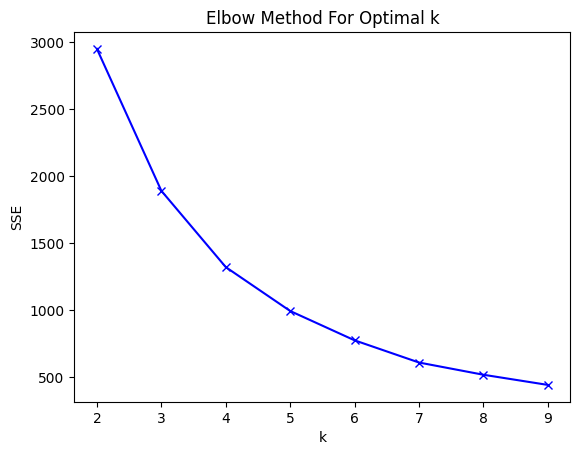

In [ ]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.52311466263303


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.5069809199346808


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.5078796959670545


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.5379208868338747


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.5487480914250895


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.5665605604519035


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.5823725289248206


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.5979444766630239


In [ ]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=5)
cluster.fit(cluster_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([new_df, segment], axis=1)
results.head()

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,4
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,1
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,1
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,4


In [ ]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,segment
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,0
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,0
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,0


In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,segment
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,1
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,1
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,1
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,1
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,1


In [ ]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2
52,Women's adidas Originals Marathon Tech Shoes,EE4954,11999,7199,40,Adidas ORIGINALS,"These shoes draft off the Marathon TR, a trail...",4.4,35,2
74,Men's adidas Originals Superstar Shoes,EG4957,7999,7999,0,Adidas ORIGINALS,These trainers born in the '70s keep the look ...,4.9,38,2
85,Men's adidas Originals FuturePacer Shoes,CM8453,19999,9999,50,Adidas ORIGINALS,The Futurepacer reworks the revolutionary desi...,3.5,1,2
86,MEN'S ADIDAS ORIGINALS MICROPACER X R1 SHOES,EE3625,15999,7999,50,Adidas ORIGINALS,These shoes are a hybrid of retro and modern a...,0.0,94,2


In [ ]:
# Menampilkan 5 data teratas dari cluster 3
results[results["segment"]==3][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,segment
1062,Men's adidas Football Copa 19+ Firm Ground Cleats,F35515,22999,13799,40,Adidas SPORT PERFORMANCE,Copa isn't just a cleat. It's an agreement tha...,3.1,34,3
1164,Men's adidas Football Predator 19+ Firm Ground...,F35613,22999,13799,40,Adidas SPORT PERFORMANCE,Predator isn't just a cleat. It's a statement ...,4.6,44,3
1326,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7826,23999,23999,0,Adidas ORIGINALS,Go for the unexpected. British designer Craig ...,2.4,86,3
1328,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7825,23999,23999,0,Adidas ORIGINALS,Go for the unexpected. British designer Craig ...,0.0,7,3
1334,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV4419,23999,23999,0,Adidas ORIGINALS,Live for the unpredictable. London-born design...,3.1,37,3


## EDA

<Axes: xlabel='segment', ylabel='Sale_Price'>

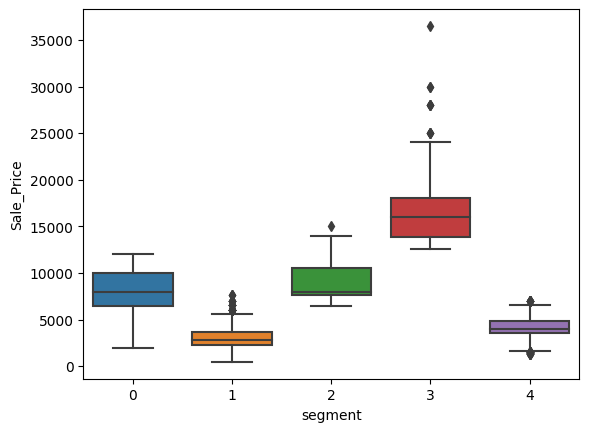

In [ ]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=results["segment"], y=results["Sale_Price"], data=results)

<Axes: xlabel='segment', ylabel='Discount'>

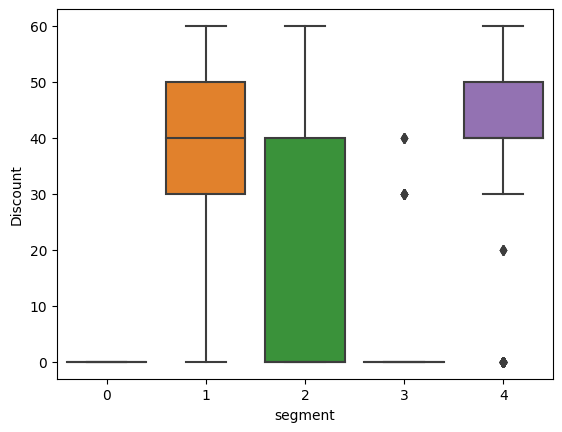

In [ ]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=results["segment"], y=results["Discount"], data=results)

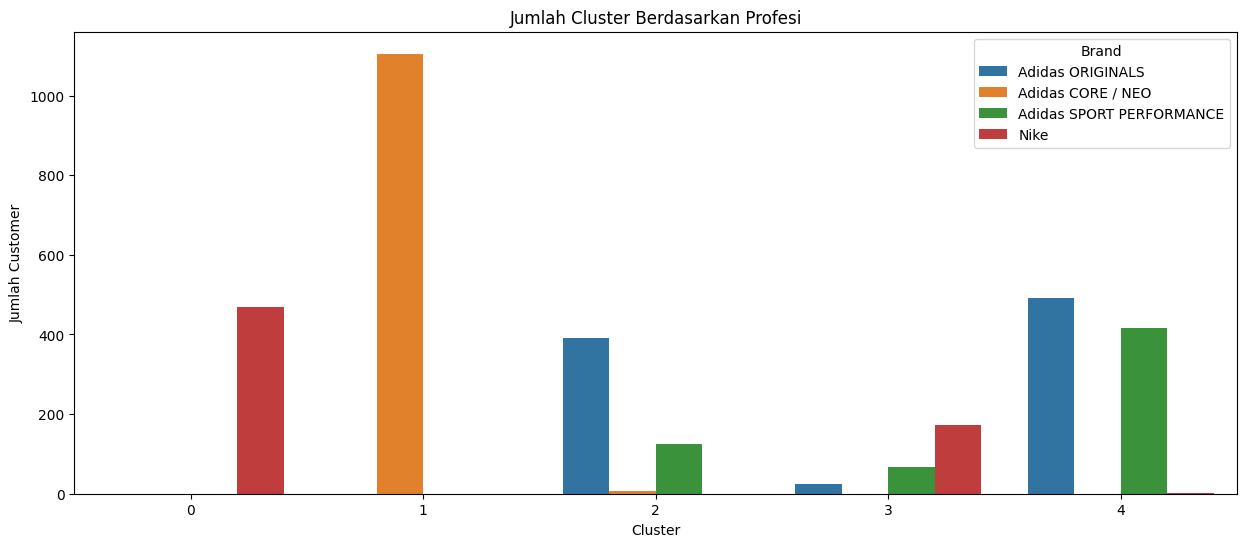

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Brand")
plt.title("Jumlah Cluster Berdasarkan Profesi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

<Axes: xlabel='Brand', ylabel='Discount'>

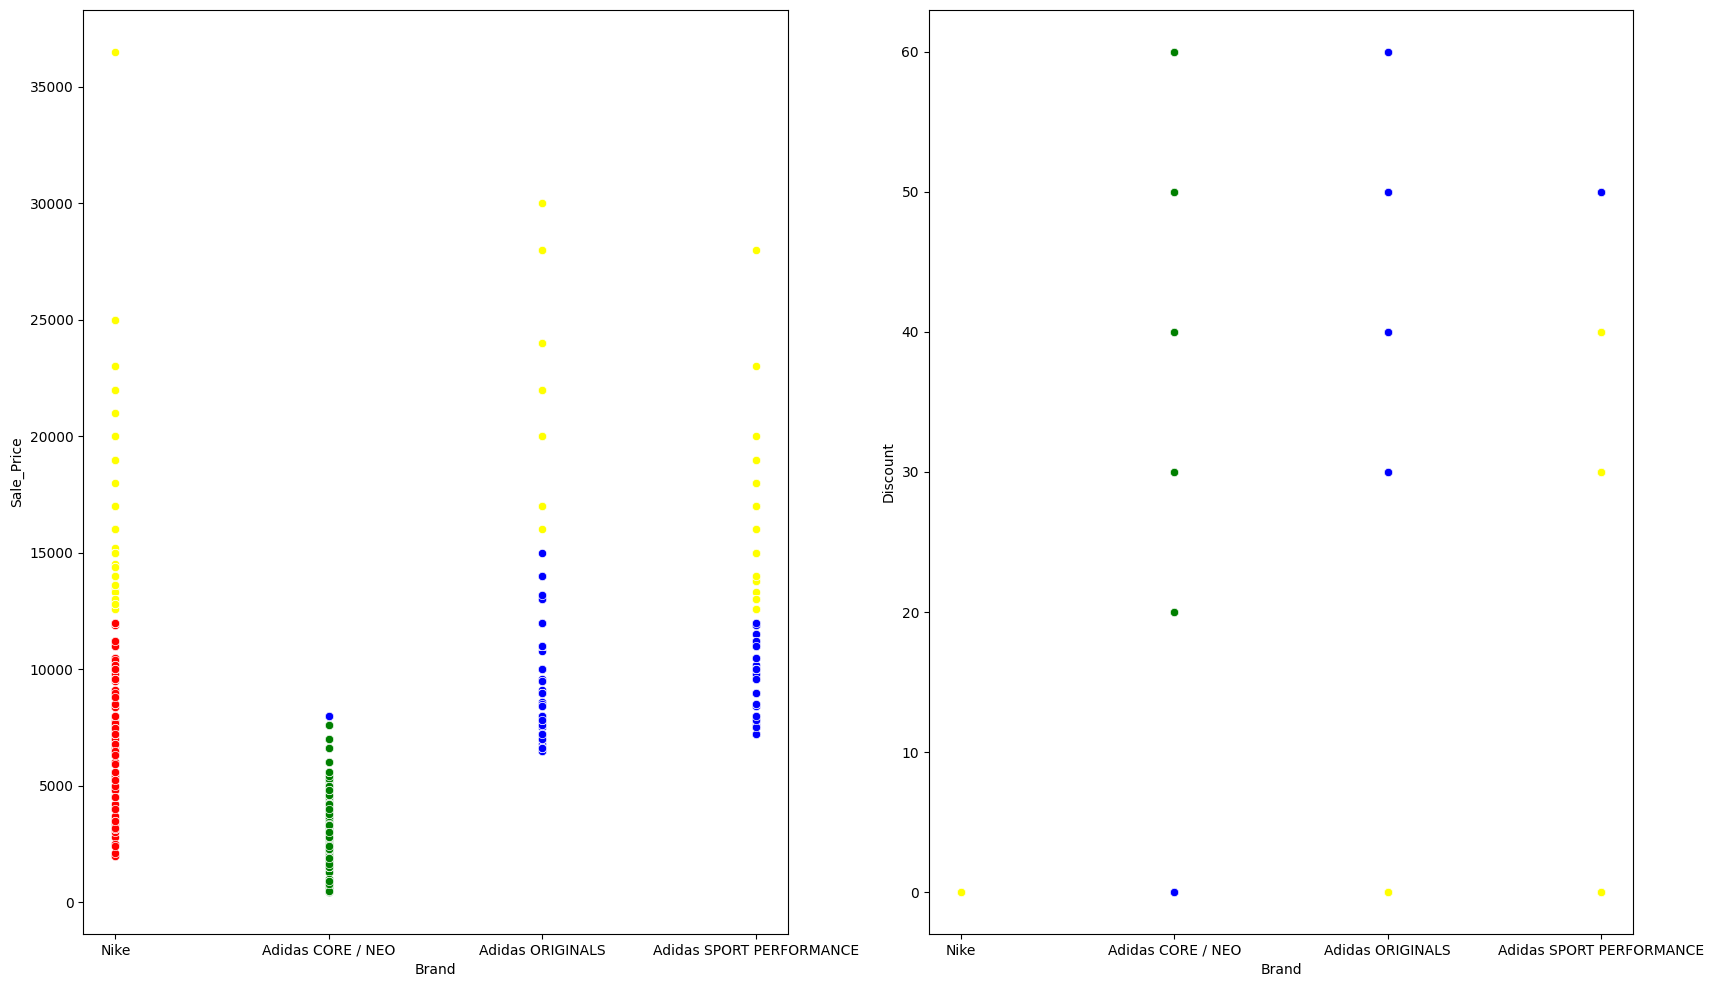

In [ ]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
fig, ax = plt.subplots(1,2, figsize=(20,12))

sns.scatterplot(x=results[results["segment"]==0].Brand, y=results[results["segment"]==0].Sale_Price, color="red", ax=ax[0])
sns.scatterplot(x=results[results["segment"]==1].Brand, y=results[results["segment"]==1].Sale_Price, color="green", ax=ax[0])
sns.scatterplot(x=results[results["segment"]==2].Brand, y=results[results["segment"]==2].Sale_Price, color="blue", ax=ax[0])
sns.scatterplot(x=results[results["segment"]==3].Brand, y=results[results["segment"]==3].Sale_Price, color="yellow", ax=ax[0])

sns.scatterplot(x=results[results["segment"]==0].Brand, y=results[results["segment"]==0].Discount, color="red", ax=ax[1])
sns.scatterplot(x=results[results["segment"]==1].Brand, y=results[results["segment"]==1].Discount, color="green", ax=ax[1])
sns.scatterplot(x=results[results["segment"]==2].Brand, y=results[results["segment"]==2].Discount, color="blue", ax=ax[1])
sns.scatterplot(x=results[results["segment"]==3].Brand, y=results[results["segment"]==3].Discount, color="yellow", ax=ax[1])

Kesimpulan


*   Kelompok pertama yaitu cluster 0 merupakan kelompok brand sepatu dengan harga jual produk saat ini yang terendah ke-3, dengan tiga produk brand dengan rentang harga cukup konsisten, diskon harga yang cukup tinggi dari 30-60
*   Kelompok kedua yaitu cluster 1 merupakan kelompok brand sepatu dengan harga jual produk saat ini terendah dari brand lainnya di satu produk saja dengan harga konsisten, diskon harga yang cukup merata mulai dari 0-60


*   Kelompok pertama yaitu cluster 2 merupakan kelompok brand sepatu dengan harga jual produk terendah ke-2 dengan satu produk brand dengan rentang harga konsisten, cluster ini tidak memiliki diskon produk
*   Kelompok pertama yaitu cluster 3 merupakan kelompok brand sepatu dengan harga jual produk saat ini paling tinggi serta rentang harga bervariasi di tiga produk berbeda, diskon juga tidak merata



